# This script demonstrates K-means algorithm
# Name : Ji-Su Lee
# Student ID : 20141718
# github link : https://github.com/Jisu-Lee/HII/tree/master/assignment03

# import packages for plotting graphs and manipulating data:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm

# define function to generate random point cluster

In [12]:
def generatePointCluster(nCluster, nPoint):
    a = np.random.rand(2, nCluster * nPoint)
    for i in range(nCluster):
        x_m = np.mean(a[0][i*nPoint:(i+1)*nPoint])
        y_m = np.mean(a[1][i*nPoint:(i+1)*nPoint])
        x_c = np.random.rand()*500 - 250
        y_c = np.random.rand()*500 - 250
        for j in range(i*nPoint, (i+1)*nPoint):
            a[0][j] = (a[0][j] - x_m)*100 + x_c
            a[1][j] = (a[1][j] - y_m)*100 + y_c
    return a

# define function to compute distance between two points

In [13]:
def computeDistance(x1, y1, x2, y2):
    dsquare = np.square(x2-x1) + np.square(y2-y1)
    return np.sqrt(dsquare)

# function to make distance list

In [14]:
def makeDistList(nCluster, pointList, cenList):
    distList = []
    for i in range(len(pointList[0])):
        cenDist = []
        for j in range(nCluster):
            cenDist.append(computeDistance(pointList[0][i], pointList[1][i], \
                                          cenList[j][0], cenList[j][1]))
        distList.append(cenDist)
    return distList

# define function to initialise label

In [15]:
def initialiseLabel(nCluster, nPoint):
    a = []
    for i in range(nCluster*nPoint):
        a.append(random.randint(1, nCluster)-1)
            
    return a

# define function to compute centroid

In [16]:
def computeCentroid(nCluster, nPoint, pointList, labelList):
    a = []
    res = []
    #initialise list [sum_x, sum_y, num]
    for i in range(nCluster):
        a.append([0, 0, 0]) 
    for i in range(nCluster*nPoint):
        a[labelList[i]][2] += 1
        a[labelList[i]][0] += pointList[0][i]
        a[labelList[i]][1] += pointList[1][i]
    # get centroid by calculating mean value
    for i in range(nCluster):
        if(a[i][2] == 0): 
            res.append([np.random.rand()*500 - 250, np.random.rand()*500 - 250])
        else:
            res.append([a[i][0]/float(a[i][2]), a[i][1]/float(a[i][2])])
    
    return res

# define fuction to assign label

In [17]:
def assignLabel(nAllPoints, distList):
    res = []
    for i in range(nAllPoints):
        res.append(0)
    for i in range(nAllPoints):
        res[i] = distList[i].index(np.amin(distList[i]))
    return res

# define function to compute energy

In [18]:
 # param : number of all points, list of points, list of centroid for each clusters, 
 # list of label for each points
def computeEnergy(nAllPoints, pointList, cenList, labelList):
    energy = 0
    for i in range(nAllPoints):
        energy += np.square(computeDistance(pointList[0][i], pointList[1][i], \
                                            cenList[labelList[i]][0], \
                                            cenList[labelList[i]][1]))
    energy = float(energy)/nAllPoints
    return energy

# initial input : setting k and number of points
# k = 3
# number of points = 100

In [45]:
nCluster = 3
nPoints = 100
nAllPoints = nCluster*nPoints
psPointList = generatePointCluster(nCluster, nPoints)
label_0 = initialiseLabel(nCluster, nPoints)

# setting color array to visualize labels

In [46]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

# attempt 1 : show initial data, label and initial centroid
# (centroid is shown as a yellow triangle)
# graph shows random centroid and labels

energy :  32273.195614681044


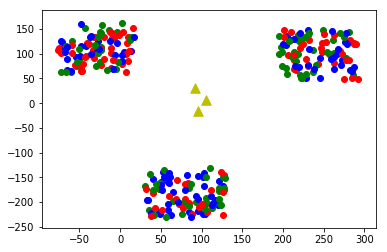

In [47]:
# compute centroid, distance, and energy
cen_0 = computeCentroid(nCluster, nPoints, psPointList, label_0)
dist_0 = makeDistList(nCluster, psPointList, cen_0)
energy = computeEnergy(nAllPoints, psPointList, cen_0, label_0)
# shows energy
print("energy : ", energy)
# plotting graph
for j in range(nAllPoints): # visualize points
    plt.scatter(psPointList[0][j], psPointList[1][j], c=colors[label_0[j]])
for j in range(nCluster):   # visualize centroids
    plt.scatter(cen_0[j][0], cen_0[j][1], s=90, marker='^', c='y')
plt.show()
# update label
label_0 = assignLabel(nAllPoints, dist_0)

# attempt 2 : left two clusters are finely distinguished, but the right top one is not clearly clustered
# (code is skipped, because for each graph code is same as [47])

energy :  9174.813247798718


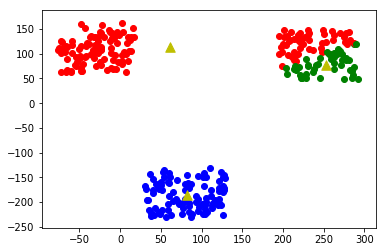

# attempt 3 : clustering completed.

energy :  1563.5676942304583


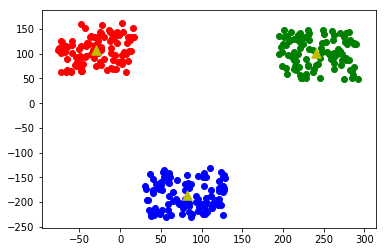

# attempt 4 : Energy converges to 1563.56

energy :  1563.5676942304583


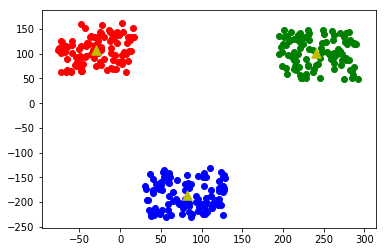